## Интерполяция и наилучшее приближение

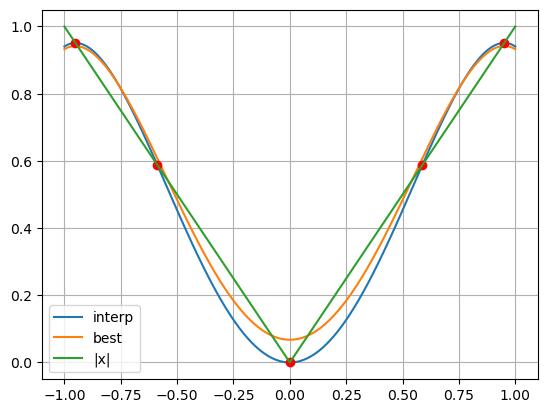

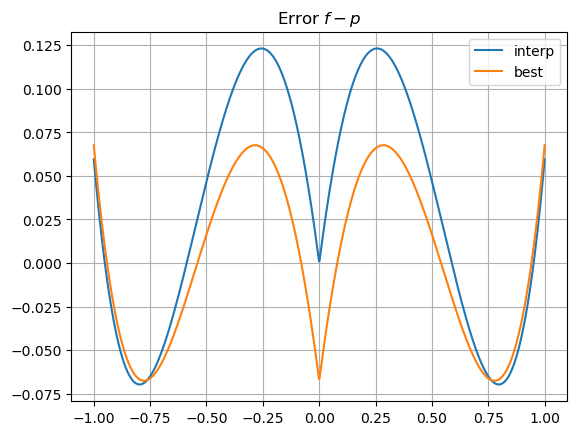

In [6]:
%matplotlib inline 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

from scipy.interpolate import BarycentricInterpolator

f = lambda x: np.abs(x)
n = 5
xc = np.cos(np.pi * (2 * np.arange(1, n+1) - 1)/(2 * n))
yc = f(xc)

p = BarycentricInterpolator(xc, yc)
xx = np.linspace(-1, 1, 1000)

# Best approximation 

yc_best = np.array([ 0.941835895383020,  
                     0.607335270071999, 
                     0.067620899277784,
                     0.607335270071999,
                     0.941835895383020])

p_best = BarycentricInterpolator(xc, yc_best)
plt.plot(xx, p(xx), label = 'interp')
plt.plot(xx, p_best(xx), label = 'best')
plt.plot(xc, yc, 'ro')
plt.plot(xx, f(xx), label = '|x|')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(xx, f(xx) - p(xx), label = 'interp')
plt.plot(xx, f(xx) - p_best(xx), label = 'best')
plt.title(r'Error $f - p$')
plt.legend()
plt.grid(True)

## Многочлены Лежандра
Многочлены Лежандра - семейство многочленов, ортогональных относительно скалярного произведения в $L_2[-1,1]$

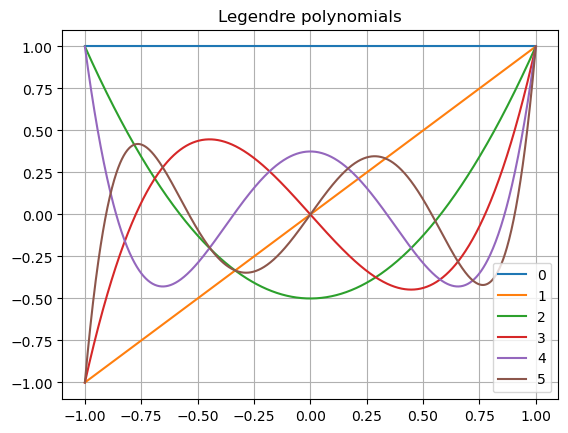

In [3]:
from scipy import special

xx = np.linspace(-1,1, 1000)

for i in range(6):
    p = special.eval_legendre(i, xx)
    plt.plot(xx, p, label = str(i))
plt.legend()
plt.title('Legendre polynomials')
plt.grid(True)

### Разложение интерполяционного многочлена по ортогональными многочленам

Q @ Q.T =  [[ 4.22071138e+00  1.99497880e-15 -5.80255748e-16  1.58384893e-16
  -2.60993089e-16]
 [ 1.99497880e-15  2.08930234e+00 -2.00788082e-16  8.57322432e-19
   9.47680052e-17]
 [-5.80255748e-16 -2.00788082e-16  1.75781250e+00 -1.55378879e-16
  -4.61632203e-16]
 [ 1.58384893e-16  8.57322432e-19 -1.55378879e-16  2.08930234e+00
  -2.09802121e-17]
 [-2.60993089e-16  9.47680052e-17 -4.61632203e-16 -2.09802121e-17
   4.22071138e+00]]


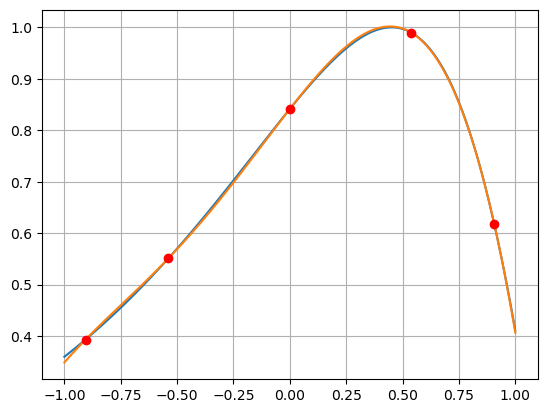

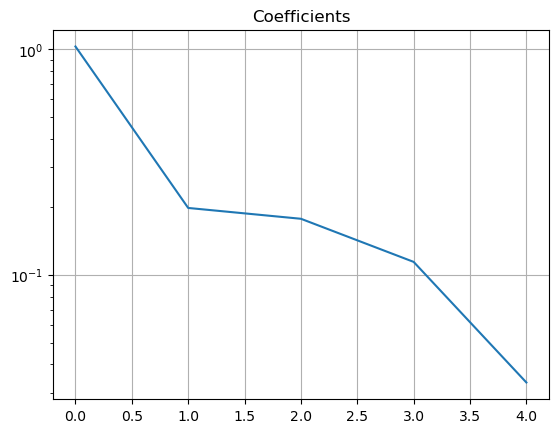

In [4]:
f = lambda x: np.sin(np.exp(x))

xx = np.linspace(-1, 1, 1000)

plt.plot(xx, f(xx), label = 'exact')
plt.grid(True)

# Construct matrix
n = 5
x, w = special.roots_legendre(n)
# print('x = ', x)
Q = np.zeros((n, n))
for i in range(n):
    Q[:, i] = special.eval_legendre(i, x)
    Q[:, i] = Q[:, i] / (2/(2*i+1))**0.5

print('Q @ Q.T = ', Q @ Q.T)

d = np.zeros(n)
for i in range(n):
    d[i] = np.linalg.norm(Q[i, :])

D2inv = np.diag(d**-2)

c = Q.T @ D2inv @ f(x)
# Compute values of interp pol
pol = np.zeros(len(xx))
for i in range(n):
    pol += c[i] * special.eval_legendre(i, xx) /(2/(2*i+1))**0.5
    
plt.plot(xx, pol, label = 'pol')
plt.plot(x, f(x), 'ro')
plt.show()
plt.semilogy(np.abs(c))
plt.title('Coefficients')
plt.grid(True)


## Приближение в $L_2$ с помощью степенного базиса

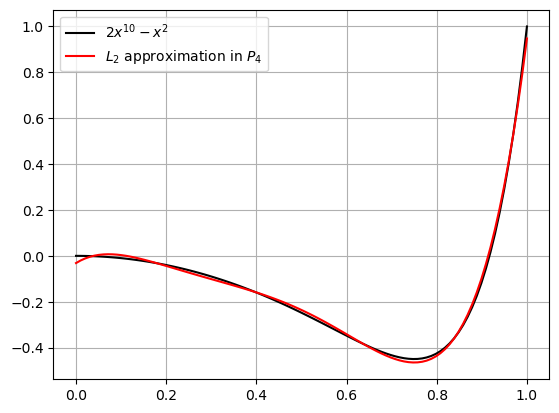

In [5]:
n = 6
p = 10
G = np.zeros((n,n))
b = np.zeros((n,1))
for i in range(1,n+1):
    b[i-1] = 2/(p+i) - 1/(i+2)
    for j in range(1,n+1):
        G[i-1,j-1] = 1/(i+j-1)
c1 = np.linalg.solve(G,b) #  Solve linear system
x = np.linspace(0,1,100)
fig, ax = plt.subplots()
ax.plot(x, 2 * x**p - x**2,'k-', label = '$2x^{10} -x^2$')
M = np.zeros((x.size, n))
for j in range(n):
    M[:,j] = x ** j
y = np.dot(M, c1)
ax.plot(x, y, 'r-', label = '$L_2$ approximation in $P_4$')
ax.legend()
ax.grid(True)